### Importing Libraries

In [ ]:
# Importing libraries

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#### Checking the Coorelation

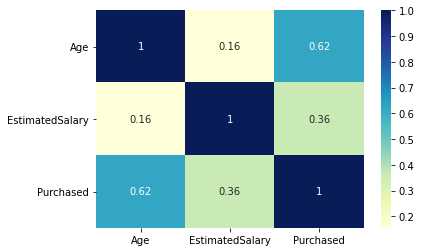

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Checking the Correlation on the Target variable using barchart

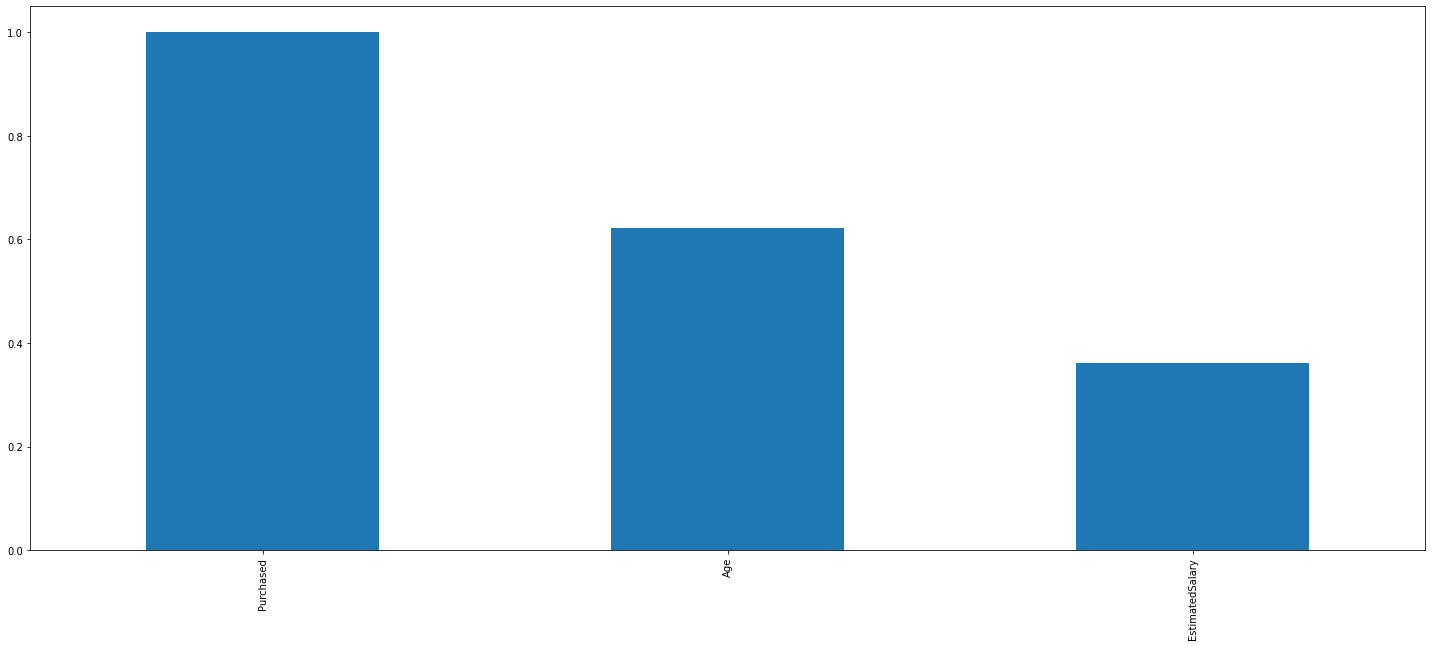

In [ ]:
plt.figure(figsize=(25,10))
df.corr()['Purchased'].sort_values(ascending = False).plot(kind='bar')
plt.show()

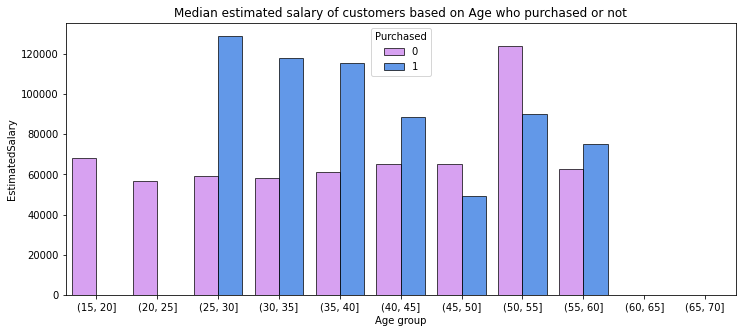

,Purchased,Age_group,Age,EstimatedSalary
0,0,"(15, 20]",19.0,68000.0
1,0,"(20, 25]",23.5,56500.0
2,0,"(25, 30]",28.0,59000.0
3,0,"(30, 35]",35.0,58000.0
4,0,"(35, 40]",38.0,61000.0
5,0,"(40, 45]",41.0,65000.0
6,0,"(45, 50]",47.0,65000.0
7,0,"(50, 55]",51.5,124000.0
8,0,"(55, 60]",59.0,62500.0
9,0,"(60, 65]",NaN,NaN


In [ ]:
age_bins = range(15,75,5)
medians_by_age_group = df.groupby(["Purchased",pd.cut(df['Age'], age_bins)]).median()
medians_by_age_group

medians_by_age_group.index = medians_by_age_group.index.set_names(['Purchased', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='EstimatedSalary',hue="Purchased", data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median estimated salary of customers based on Age who purchased or not')
ax.set_xlabel('Age group')
plt.show()

medians_by_age_group

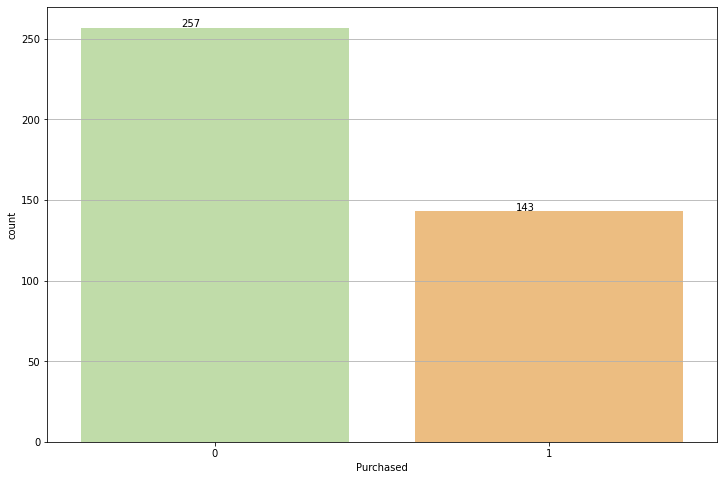

In [ ]:
plt.figure(figsize = (12,8))
plt.grid(True)
ax = sns.countplot(x='Purchased', data=df, palette='Spectral_r')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.5))

In [ ]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)



## Support Vector machine

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=2,stratify=y)
model=SVC()
model.fit(X_train,y_train)
print(f' Training Accuracy {model.score(X_train,y_train)}')
f'Test Accuracy {model.score(X_test,y_test)}'

 Training Accuracy 0.9142857142857143


'Test Accuracy 0.9083333333333333'

## KNN Model

0.9083333333333333


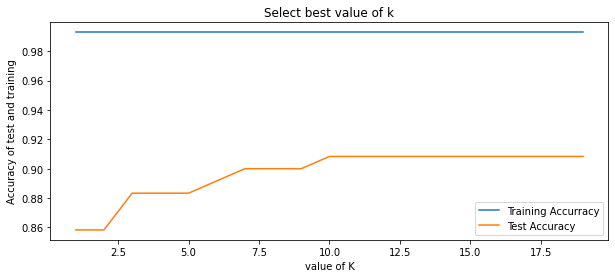

In [ ]:
k = range(1,20)
trainingAccuracy = []
testAccuracy=[]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=15,p=1,weights='distance')
    knn.fit(X_train,y_train)
    trainingacc = knn.score(X_train,y_train)
    trainingAccuracy.append(trainingacc)
    testAccuracy.append(knn.score(X_test,y_test))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
plt.xlabel("value of K")
plt.ylabel("Accuracy of test and training")
plt.title("Select best value of k")
plt.plot(k,trainingAccuracy)
plt.plot(k,testAccuracy)
  #axes[0].legend(['loss','val_loss'])
axes.legend(["Training Accurracy","Test Accuracy"])
print(max(testAccuracy))

In [ ]:
k_range = list(range(1,50))
weight_options = ["uniform", "distance"]
pe=[1,2]

param_grid = dict(n_neighbors = k_range, weights = weight_options,p=pe)
knn = KNeighborsClassifier()

knngrid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy',n_jobs=15)
knngrid.fit(X_train,y_train)

print ("Best score on 10 folds split Data on Train split:- ",knngrid.best_score_)
print ("Best Param:- ",knngrid.best_params_)
print ("Best KNN Metric:- ", knngrid.best_estimator_)

print(f' Training Accuracy {knngrid.score(X_train,y_train)}')
f'Test Accuracy {knngrid.score(X_test,y_test)}'

Best score on 10 folds split Data on Train split:-  0.9142857142857144
Best Param:-  {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best KNN Metric:-  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
 Training Accuracy 0.9357142857142857


'Test Accuracy 0.9'

Text(69.0, 0.5, 'Truth')

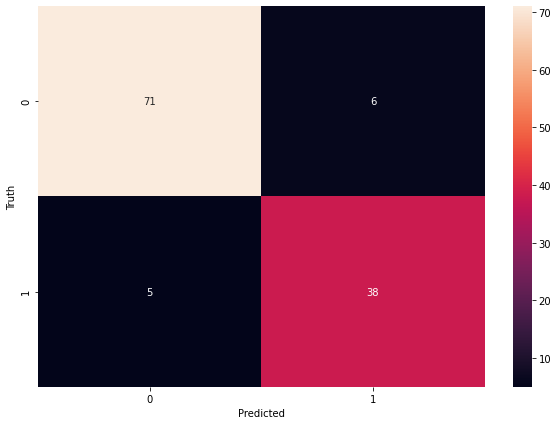

In [ ]:
y_predicted = knn_model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_jobs=15,n_neighbors=15,p=1,weights='distance')
knn_model.fit(X_train,y_train)
print(f' Training Accuracy {knn_model.score(X_train,y_train)}')
f' Testing Accuracy {knn_model.score(X_test,y_test)}'

 Training Accuracy 0.9928571428571429


' Testing Accuracy 0.9083333333333333'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


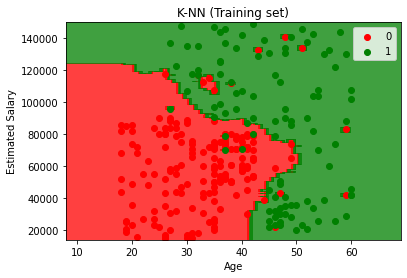

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knn_model.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


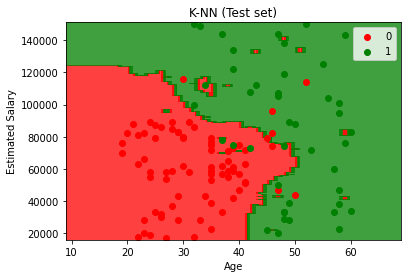

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = scaler.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knn_model.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

log_model.fit(X_train, y_train)

print(f' Training Accuracy {log_model.score(X_train,y_train)}')
f'Test Accuracy {log_model.score(X_test,y_test)}'

 Training Accuracy 0.8142857142857143


'Test Accuracy 0.8416666666666667'

## Neural Network

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


from sklearn.model_selection import GridSearchCV
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],            
        }
       ]
clf = GridSearchCV(MLPClassifier(), param_grid, cv=folds,
                           scoring='accuracy',n_jobs=-1,verbose = 1,
)
clf.fit(X_train, y_train)

print(f' Training Accuracy {clf.score(X_train,y_train)}')
f'Test Accuracy {clf.score(X_test,y_test)}'


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.0s


 Training Accuracy 0.9285714285714286


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.5s finished


'Test Accuracy 0.9166666666666666'

In [ ]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results[cv_results.rank_test_score<5]
#print the optimum value of hyperparameters
print('Best hyperparameters: ', clf.best_params_)

Best hyperparameters:  {'activation': 'relu', 'solver': 'lbfgs'}


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>= 0.95):
      print("\nReached 97% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(800, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2500,batch_size=32, callbacks=[callbacks])

Epoch 1/2500
9/9 [==============================] - 0s 4ms/step - loss: 2.0025 - accuracy: 0.4893
Epoch 2/2500
9/9 [==============================] - 0s 4ms/step - loss: 1.0100 - accuracy: 0.6679
Epoch 3/2500
9/9 [==============================] - 0s 4ms/step - loss: 0.6663 - accuracy: 0.6750
Epoch 4/2500
9/9 [==============================] - 0s 4ms/step - loss: 0.6551 - accuracy: 0.6464
Epoch 5/2500
9/9 [==============================] - 0s 4ms/step - loss: 0.5753 - accuracy: 0.7571
Epoch 6/2500
9/9 [==============================] - 0s 4ms/step - loss: 0.5108 - accuracy: 0.8429
Epoch 7/2500
9/9 [==============================] - 0s 4ms/step - loss: 0.4319 - accuracy: 0.8643
Epoch 8/2500
9/9 [==============================] - 0s 4ms/step - loss: 0.3794 - accuracy: 0.8679
Epoch 9/2500
9/9 [==============================] - 0s 4ms/step - loss: 0.3624 - accuracy: 0.8429
Epoch 10/2500
9/9 [==============================] - 0s 4ms/step - loss: 0.3256 - accuracy: 0.8750
Epoch 11/2500
9/9 [

In [ ]:
print("Accuracy on test data is ",model.evaluate(X_test, y_test))
print("Predicted value of ytest[4] is ",np.argmax(y_predicted[4]))
print("Actual Predicted value is:- ",y_test[4])


4/4 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.9000
Accuracy on test data is  [0.31606197357177734, 0.8999999761581421]
Predicted value of ytest[4] is  0
Actual Predicted value is:-  0
